# Educational Project UCM-UPM 
# Practical Quantum Computing, script 2 
#### Authors: JJ Gálvez Viruet, Felipe J. Llanes Estrada, Ignacio González Castro
Estimated time to work through the notebook: 1 hour 45 min.

### 1. Import packages
The following "cell" (a paragraph of code) imports the functions which will be used in the "notebook" (this file).

We recommend to <font color=red> not change it </font> to avoid malfunction, simply execute it clicking on it and hitting Shift+Enter.

Later on you will have to answer questions which <font color="teal"> will be highlighted in teal color </font>

In [1]:
# A classical simulator of quantum circuits
from qiskit_aer import AerSimulator

# Class QuantumCircuit, with methods (functions) to define quantum circuits
from qiskit import QuantumCircuit

# A function yielding a histogram with the probabilities of each of the eigenstates taken by the measured qubits
from qiskit.visualization import plot_histogram

# Class Statvector, to retrieve the state of the circuit
from qiskit.quantum_info import Statevector

# Other usual functions
from math import sqrt, pi
import numpy as np

### 2. Defining circuits
The "class" (an abstraction in object-oriented programming: think of objects and their operations, like a group, a ring or a field in mathematics) <font color=blue> QuantumCircuit() </font> allows to define quantum circuits as the objects to which we can apply operations (quantum gates) such as the Pauli matrices X, Y, Hadamard H, etc. from script 1 (your Quirk lab).
To define a circuit we need two inputs:

- **regs**: if you pass a positive integer, it becomes the number of qubits; if two positive integers, the second is the number of classical bits in which the outcomes of any measurements will be stored. That is, the size of the problem.
- **name**(str): An optional name for the circuit (in case you have several in the same notebook)

In [2]:
qc1 = QuantumCircuit(1) #1 qubit circuit, it's state is |0> by default
qc11 = QuantumCircuit(1,1) #1 qubit and 1 classical bit circuit

We may depict a circuit with <font color=blue> draw() </font> (a method of the class QuantumCircuit, applicable to the objects just created by a dot . ). 
Specifying the output as "mpl" returns the drawing as an object of matplotlib, a python package.

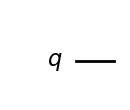

In [3]:
qc1.draw(output='mpl')

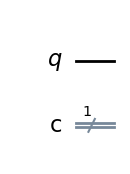

In [4]:
qc11.draw(output='mpl')

#### 2.1 Initial configuration of the qubits 
By default, qubits start in $|0\rangle$. The method <font color=blue> initizalize()</font> allows to customize this.
It takes two input variables:
- **state**: initial state of the qubit, which may be entered as a list of two coordinates in the canonical ("computational") basis, $|0\rangle = [1,0]$; $|1\rangle = [0,1]$
- **qubits** (QuantumRegister or Qubit or int): index to decide which qubit will be initialized (from top to bottom of the circuit in the screen, 0, 1, 2...).

States <font color=red> must be normalized </font>. To achieve this, remember to divide by the modulus of the state vector, $\vec{v}=[v_1,v_2]$, $|\vec{v}| = \sqrt{v_1^2+v_2^2}$. This norm (denominator) can also be computed with the method *linalg.norm* to which we should pass $[v_1,v_2]$, the list of coordinates. 

In [5]:
state_1 = [0,1] # this would be |1>, trivially normalized
invalid_state = [1,1] # that is not normalized!
state11 = [1,1]/np.linalg.norm([1,1]) # This works: we normalize the vector
state13 = [1,np.sqrt(3)]/np.linalg.norm([1,np.sqrt(3)]) # normalized state where 1 is three times more likely than 0 upon measurement
#qc11.initialize(state_1,0) 
qc11.initialize(state_1,0) 
qc11.draw()

┌─────────────────┐
  q: ┤ Initialize(0,1) ├
     └─────────────────┘
c: 1/═══════════════════

### 3. Executing circuits

#### 3.1 Import the classical simulator
Small circuits can be classically simulated with the help of (pseudo)random numbers. We will use the class "Aer" and its "get_backend" (in spanish "definir motor", a major piece of code which functions behind what we see, the user interface). 

In [6]:
sim = AerSimulator()

#### 3.2 Class <font color=blue> Statevector </font>

In [7]:
# We may retrieve the state of the circuit defining an object of the class Statevector using as input the circuit:
psi1 = Statevector(qc11) 
# The coordinates of the final state are the attribute *data* of the object. Let us print them:
# Note that the imaginary unit is j (engineering convention as opposed to i in physics/mathematics)
psi1.data 

array([0.+0.j, 1.+0.j])

Next, we will see how to invoke <font color=blue> sim.run()</font>, a method for the simulator "sim" instantiated above, which executes the circuit. 
This still requires a couple of steps.

#### 3.3 "Measure" method

The <font color=blue> Statevector </font> class is only meaningful in a simulation context, for a real experiment we need to add measurements to the circuit:

Employ <font color=blue> measure( , ) </font>, taking two inputs:
  - **qubit index**: natural number indexing the qubit to be measured. It starts assigning 0, from the top.
  - **c-bit index**: natural number indicating the classical bit where the measured eigenvalue will be kept. Again, it starts from the top line of the circuit to which 0 is assigned. 

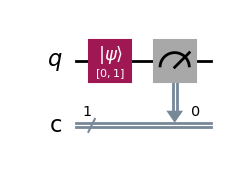

In [8]:
qc11.measure(0,0)
qc11.draw(output='mpl')

The measurement "collapses" the qubit to a specific eigenstate, so successive measurements are idle. 
We keep a record of the measurement thanks to the method <font color=blue>  get_counts()</font>. (The default number of runs is 1024, later in section 4 we will customize it.)

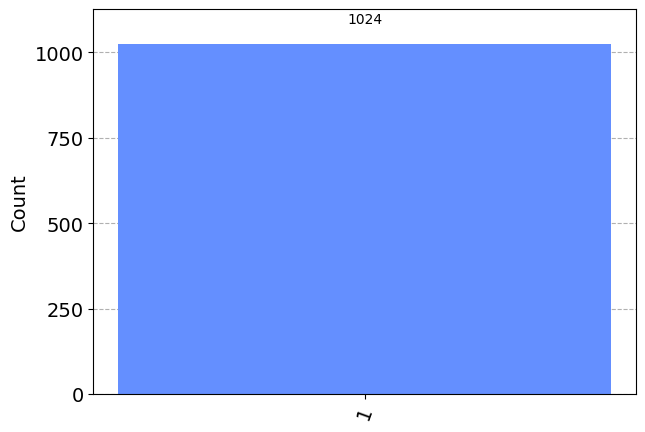

In [9]:
resultmeasure = sim.run(qc11).result() # Execute the circuite qc11 in the simulator

counts = resultmeasure.get_counts() # Results of the measurements
plot_histogram(counts) # Plot a histogram with that variable

Question: <font color=teal> Why does the histogram have only one bar corresponding to |1>  ? </font>

We may also employ <font color=blue> measure_all() </font> to measure all qubits at once; classical bits are automatically added.

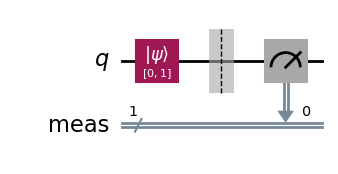

In [10]:
qc2 = QuantumCircuit(1)
qc2.initialize(state_1, 0)
qc2.measure_all() # Medición en el circuito 2
qc2.draw(output='mpl') # Let us draw it again

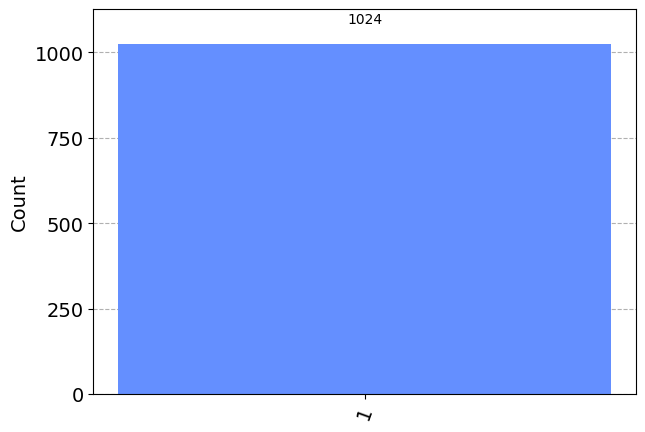

In [11]:
resultmeasure2 = sim.run(qc2).result()# Execute the circuite qc2 in the simulator
#This time there is nothing we can load, so we continue

counts2 = resultmeasure2.get_counts() # Results of the measurements
plot_histogram(counts2)  # Plot a histogram with that variable

Again a trivial histogram; but a circuit initialized to *state13* as defined above will be more interesting:

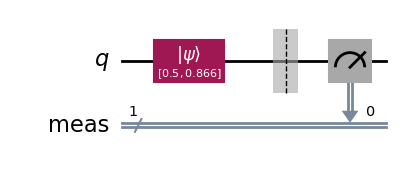

In [12]:
# Initialize a circuit to state13
qc3 = QuantumCircuit(1) 
qc3.initialize(state13, 0) 

# Now measure all qubits
qc3.measure_all()

# Execute the circuit 
resultmeasure3 = sim.run(qc3).result()

qc3.draw(output='mpl')

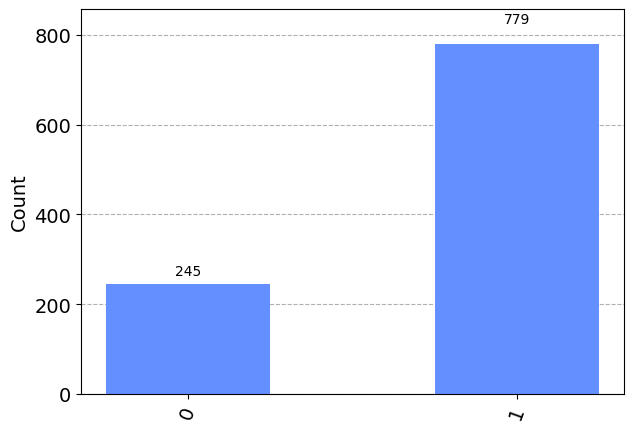

In [13]:
# Prepare a histogram with the results
counts3 = resultmeasure3.get_counts()
plot_histogram(counts3)

### 4. Now something practical: generation of truly random numbers with a quantum computer

Classical computers, being deterministic machines, only generate **pseudorandom** numbers: 
sequences of numbers which may be distributed as true random numbers, but are perfectly determined by the initial **seed**.  To make them more random, the seed is often taken from the computer time or the battery remaining at the instant of calculation (in random.org they are taken from atmospheric noise, but this requires an external probe). Moreover, the mathematical congruences employed have a (very large) cyclicity, so that eventually the sequence will start giving you the same numbers in the same order.

Because  **the outcome of a quantum measurement is a true random number**, quantum computers give us truly random sequences. Here we simulate the process (which you may another day run in a true quantum computer) obtaining a random integer between 0 and 15 (with 4 qubits)

First, we create a circuit with four qubits and four classical bits to receive the respective measurements.

Next, we initialize them with an equally likely overlap of  $\lvert 0\rangle$ y $\lvert 1 \rangle$. 

<font color= teal> Question: Can you write in a piece of paper the initial state in the second line of the next paragraph?</font>

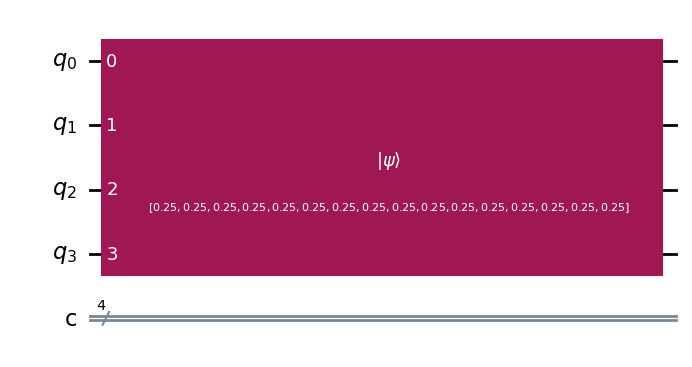

In [14]:
qrng = QuantumCircuit(4,4) 
init_state = np.kron([1,1],np.kron([1,1],np.kron([1,1],[1,1]))) # Kron is a Python command for Cartesian (or Kronecker) products
init_state_normal = init_state/np.linalg.norm(init_state)
qrng.initialize(init_state_normal,[0,1,2,3]) 
qrng.draw(output='mpl')

We now measure every qubit and send the result to the corresponding classical bit (all are contained by the double line in the drawing below)

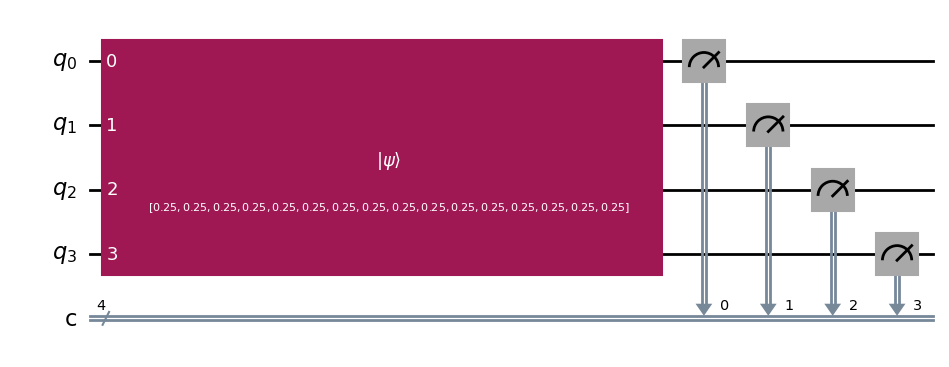

In [15]:
qrng.measure([0,1,2,3], [0,1,2,3]) 
qrng.draw(output='mpl') 

With the circuit defined, we can run it once to obtain exactly one random number. 

To run it N times (here, N=1) we need to specify the value of the *shots* argument to the <font color=blue> run </font> method.`

In [16]:
result = sim.run(qrng,shots=1).result()
rn_bin = result.get_counts(qrng)
print(rn_bin)

{'0111': 1}


<font color=teal> Question: run the circuit a few times and write down the number obtained </font>

Finally, we convert the result to the decimal numeral system (python's <font color="blue"> int() </font> takes a list of components and the base for the powers, here 2, returning the integer)

In [17]:
decimal_result = int(list(rn_bin.keys())[0], 2)
print(decimal_result)

7


We may easily encapsulate this computation defining it as a python function, simplifying its inclusion in algorithms for more sophisticated problems.


In [18]:
def QRNG(): #a quantum random number generator
    qrng = QuantumCircuit(4,4) 
    init_state = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
    init_state_normal = init_state/np.linalg.norm(init_state)
    qrng.initialize(init_state_normal,[0,1,2,3]) 
    qrng.measure([0,1,2,3], [0,1,2,3]) 
    result = sim.run(qrng,shots=1).result()
    counts = result.get_counts(qrng)
    decimal_result = int(list(counts.keys())[0], 2)
    return decimal_result

In [19]:
rn = QRNG()
print(rn)

14


<font color=teal> Question: Write a loop that generates 32 random numbers and plot a histogram with their distribution </font>

To insert new cells go to the menu at the top of this tab and select **+**. To its left you may choose between a *code* cell or a text  (*markdown*) cell.

<font color=teal> Question: Write down in a piece of paper all the methods that you have learned here </font>

### 5. Quantum Fourier transform

#### 5.1. Theory precis

The discrete Fourier transform of a vector with amplitudes $\left\{x_0,x_1,...,x_{N-1}\right\}$ is another vector with amplitudes $\left\{p_0,p_1,...,p_{N-1}\right\}$ given by

$$ p_k = \frac{1}{\sqrt{N}}\sum^{N-1}_{j=0}x_j e^{2\pi i j k /N}, $$

which may be interpreted as a change of basis. The elements of the $B$ and the $F(B)$ bases are then related by
$$\left|j\right\rangle_{B}\rightarrow \left|j\right\rangle_{F(B)} =  \frac{1}{\sqrt{N}}\sum^{N-1}_{k=0} e^{2\pi i j k /N}\left|k\right\rangle_{B},$$
so that
$$\sum_j x_j \left|j\right\rangle_{F(B)} = \sum_k p_k \left|k\right\rangle_{B}.$$
In a quantum machine, $B$ is the computational basis. For a system of $n$ qubits one has $N=2^n$ states: 
$\{ | 0\rangle ,|1 \rangle,\dots ,|N-1\rangle \} $. Written in the binary representation this is $|j\rangle= |j_1j_2...j_n \rangle $, with $j = j_1 2^{n-1} + j_2 2^{n-2} + ... + j_n 2^0$. This representation serves to give a product form to the change of basis / Fourier transform, where each term in the product acts over a particular qubit,
$$\left|j\right\rangle_{B}=\left|j_1 ... j_n\right\rangle_{B} \rightarrow \frac{\left(\left|0\right\rangle+e^{2\pi i j_n/2}\left|1\right\rangle\right)\left(\left|0\right\rangle+e^{2\pi i \left(j_{n-1}/2 + j_n/4\right)}\left|1\right\rangle\right)...\left(\left|0\right\rangle+e^{2\pi i \left(j_1/2 + ... + j_n/2^n\right)}\left|1\right\rangle\right)}{2^{n/2}},$$
that we will implement in what follows. 

#### 5.2. Implementation. A 3-qubit example. 


A cursory look at the expression from the last paragraph suggests
the usefulness of a gate to perform the following 1-qubit operation:

$$\alpha |0\rangle + \beta | 1 \rangle \rightarrow  \alpha | 0 \rangle +\beta e^{2\pi i\ /\ 2^k} | 1 \rangle $$
We can represent such operation in matrix form as 
$$R_k = \begin{pmatrix}
1 & 0 \\
0 & e^{2\pi i /2^k}
\end{pmatrix},$$
while one of the basic transformations in the Qiskit package es *PhaseGate*, with matrix representation
$$\text{PhaseGate}(\phi) = \begin{pmatrix}
1 & 0 \\
0 & e^{i\phi}
\end{pmatrix}.$$
Hence,

<font color="teal"> **Question 5.1.** Check that the following function implements the $R_k$ transformation: </font> 

In [36]:
from qiskit.circuit.library import PhaseGate, XGate
def R(k):
    return PhaseGate((2.*np.pi)/pow(2,k))

<font color="teal"> To do so create a one-qubit circuit and add the gate using the method <font color=blue> append(,) <font color="teal">, which takes two input arguments:  </font>
- <font color="teal"> **Operation** to be included in the circuit </font>
- <font color="teal"> **Index list** specifying the qubits to which the gate will be applied  </font>
    
Example usage:

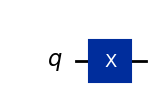

In [37]:
Example1 = QuantumCircuit(1)
Example1.append(XGate(),[0])
Example1.draw(output='mpl')

Standard gates such as Hadamard's, Pauli-X,Y,Z and CNOT do not require the <font color=blue> append(,) </font> sintax and can be directly appended (as methods) to the circuit object, with the dot notation:

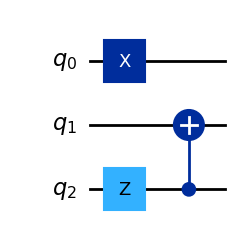

In [38]:
Example2 = QuantumCircuit(3)
Example2.x(0)
Example2.z(2)
Example2.cx(2,1)
Example2.draw(output='mpl')

After these preliminaries we may start implementing the Quantum Fourier Transform. Return to the last formula of 5.1.

In the first place, the Hadamard gate produces the transformation (one-qubit Fourier transform)
$$| 0\rangle \rightarrow\frac{1}{\sqrt{2}}\left(| 0 \rangle+ | 1\rangle \right),\ \ \ \ \ \  | 1\rangle \rightarrow\frac{1}{\sqrt{2}}\left(| 0\rangle- |1 \rangle\right),$$
or, equivalently (remember $j_1=0,1$),
$$| j_1\rangle\rightarrow \frac{1}{\sqrt{2}}\left(\left|0\right\rangle+e^{(2\pi i) j_1/2}\left|1\right\rangle\right).$$
Proceeding to add the remaining qubits,
$$|j_1j_2j_3\rangle \rightarrow | \psi_1\rangle = \frac{1}{\sqrt{2}}
\left( | 0 \rangle + e^{(2\pi i) j_1/2} |1\rangle\right) 
|j_2j_3\rangle.$$

To get started, let us instantiate a quantum circuit object, and add a Hadamard to the last qubit.

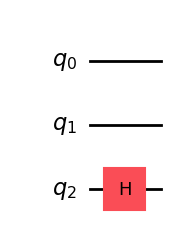

In [39]:
qft_circuit = QuantumCircuit(3, name = 'QFT')
qft_circuit.h(2)
qft_circuit.draw(output='mpl')

We can quickly check out the state vector of the whole circuit. In this case, the coordinates in a space of dimension $2^3=8$,

In [40]:
phi1 = Statevector(qft_circuit)
phi1

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.70710678+0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j],
            dims=(2, 2, 2))


We see that we obtained a superposition of the kets $|0\rangle$ and $| 4\rangle$. To get the multiplicative phase $e^{2\pi i j_2 /4}$ on the last qubit we need to apply the gate $R(2)$ controlling the value of the middle one, converting $R(k)$ into a control gate. This is achieved by the method <font color=blue> control() </font>

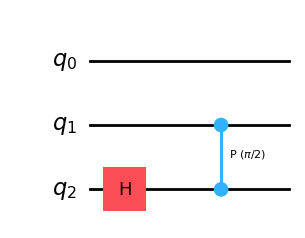

In [41]:
# The operation R(2).control() now acts on two qubits, so it takes two indices on input:
# the first points to the target qubit, the second to the control one
qft_circuit.append(R(2).control(),[2,1]) 
qft_circuit.draw(output='mpl')

which runs
$$| j_1j_2j_3\rangle \rightarrow | \psi_1\rangle = \frac{1}{\sqrt{2}}\left(\left|0\right\rangle+e^{2\pi i (j_1/2 +j_2/4)}\left|1\right\rangle\right)\otimes | j_2j_3\rangle.$$

**Question 5.2** <font color="teal"> Write the state resulting from applying that transformation to the initial ket
 $| 010\rangle$.
    Check, with the <font color="blue">Statevector <font color="teal">
    class that the circuit generates the correct output.</font>

To finish with that last qubit, we need the phase factor $e^{2\pi i j_3/8}$:
$$|j_1j_2j_3\rangle\rightarrow |\psi_1\rangle = \frac{1}{\sqrt{2}}\left(\left|0\right\rangle+e^{2\pi i (j_1/2 +j_2/4 + j_3/8)}\left|1\right\rangle\right) \otimes |j_2j_3\rangle.$$
so the circuit becomes

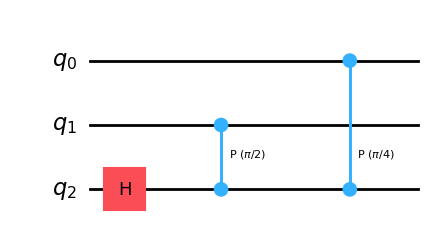

In [42]:
qft_circuit.append(R(3).control(),[2,0]) 
qft_circuit.draw(output='mpl')

Performing now the needed operations on the middle and the upper qubits we get:

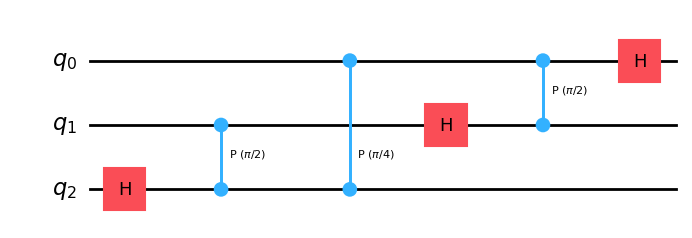

In [43]:
qft_circuit.h(1)
qft_circuit.append(R(2).control(),[1,0])
qft_circuit.h(0)
qft_circuit.draw(output='mpl')

that transforms

$$| j_1j_2j_3\rangle \rightarrow\frac{1}{2^{3/2}}\left(\left|0\right\rangle+e^{2\pi i (j_1/2+j_2/4+j_3/8)}\left|1\right\rangle\right)\left(\left|0\right\rangle+e^{2\pi i (j_2/2+j_3/4)}\left|1\right\rangle\right)\left(\left|0\right\rangle+e^{2\pi i j_3/2}\left|1\right\rangle\right),$$

so that, to complete the Fourier transform, we apply a SWAP gate to exchange the first and last qubits, because we have them on the wrong positions,

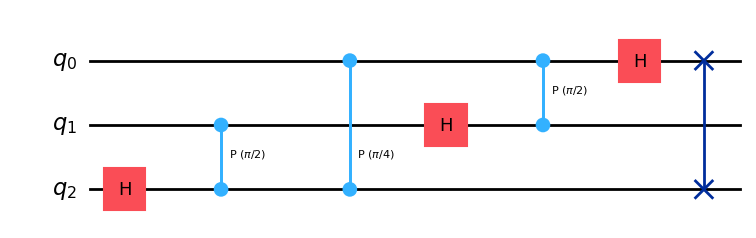

In [44]:
qft_circuit.swap(2,0)
qft_circuit.draw(output='mpl')

that finally is the wanted transformation,
$$| j_1j_2j_3\rangle \rightarrow  \frac{1}{2^{3/2}}  
  \left( |0\rangle+e^{2\pi i j_3/2} |1\rangle\right) \otimes
  \left( |0\rangle+e^{2\pi i (j_2/2+j_3/4)} |1\rangle\right) \otimes
  \left( |0\rangle+e^{2\pi i (j_1/2+j_2/4+j_3/8)}|1\rangle\right).$$
We can write the circuit in one pass:

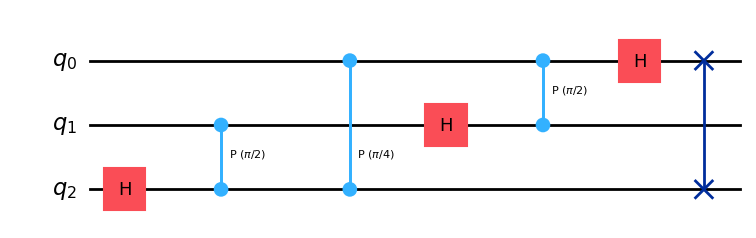

In [45]:
qft3 = QuantumCircuit(3, name = 'QFT3')
# Transforming qubit q_2:
qft3.h(2)
qft3.append(R(2).control(),[2,1])
qft3.append(R(3).control(),[2,0])
# Transforming qubit q_1:
qft3.h(1)
qft3.append(R(2).control(),[1,0])
# Transforming qubit q_0:
qft3.h(0)
# SWAP
qft3.swap(0,2)
qft3.draw(output='mpl')

We may keep the entire circuit as one three-qubit gate to be used later on (so as to build more complex projects in a modular way) with the method <font color=blue> to_gate() </font>,

In [46]:
qft3_gate = qft3.to_gate()

This may now be used as subroutine; as an example, let us see of transforming the following state
\begin{eqnarray*} |\psi_1\rangle &=& \frac{1}{2^{3/2}}\left(\left|0\right\rangle+\left|1\right\rangle\right)\left(\left|0\right\rangle+\left|1\right\rangle\right)\left(\left|0\right\rangle-\left|1\right\rangle\right) \\ &=& \frac{1}{2^{3/2}}\left(\left|0\right\rangle-\left|1\right\rangle+\left|2\right\rangle-|3\rangle+|4\rangle-|5\rangle+|6\rangle-\left|7\right\rangle\right),\end{eqnarray*}

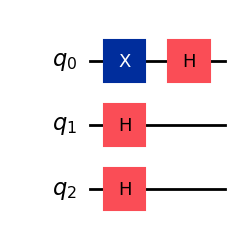

In [47]:
Example3 = QuantumCircuit(3)
# Let us prepare the state
Example3.x(0)
Example3.h(0)
Example3.h(1)
Example3.h(2)
Example3.draw(output='mpl')

In [48]:
phi1 = Statevector(Example3)
phi1.data

array([ 0.35355339+0.j, -0.35355339+0.j,  0.35355339+0.j, -0.35355339+0.j,
        0.35355339+0.j, -0.35355339+0.j,  0.35355339+0.j, -0.35355339+0.j])

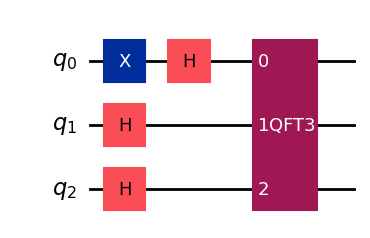

In [49]:
Example3.append(qft3_gate,[0,1,2])
Example3.draw(output='mpl')

In [50]:
Fphi1 = Statevector(Example3)
Fphi1.data

array([2.36158002e-17+0.00000000e+00j, 1.55582133e-19-6.44442296e-20j,
       4.76210391e-18-4.76210391e-18j, 1.55582133e-19-3.75608496e-19j,
       1.00000000e+00+0.00000000e+00j, 1.55582133e-19+3.75608496e-19j,
       4.76210391e-18+4.76210391e-18j, 1.55582133e-19+6.44442296e-20j])

This corresponds with $|4\rangle$, the number of times that the original state performed a complete change of sign.

#### <font color="teal"> 5.3 QFT full exercise</font>

<font color="teal"> Please implement now the Quantum Fourier Transform as a gate acting over 5 qubits.  Apply this gate to the following states.</font>

$$ |\phi_1\rangle = \frac{1}{2^{5/2}}\left(\left|0\right\rangle+\left|1\right\rangle\right)\left(\left|0\right\rangle+\left|1\right\rangle\right)\left(\left|0\right\rangle+\left|1\right\rangle\right)\left(\left|0\right\rangle+\left|1\right\rangle\right)\left(\left|0\right\rangle-\left|1\right\rangle\right)$$
$$ |\phi_2\rangle = \frac{1}{2^{5/2}}\left(\left|0\right\rangle+\left|1\right\rangle\right)\left(\left|0\right\rangle+\left|1\right\rangle\right)\left(\left|0\right\rangle+\left|1\right\rangle\right)\left(\left|0\right\rangle-\left|1\right\rangle\right)\left(\left|0\right\rangle+\left|1\right\rangle\right)$$
$$ |\phi_3\rangle = \frac{1}{2^{5/2}}\left(\left|0\right\rangle+\left|1\right\rangle\right)\left(\left|0\right\rangle+\left|1\right\rangle\right)\left(\left|0\right\rangle-\left|1\right\rangle\right)\left(\left|0\right\rangle+\left|1\right\rangle\right)\left(\left|0\right\rangle+\left|1\right\rangle\right)$$
$$ |\phi_4\rangle = \frac{1}{2^{5/2}}\left(\left|0\right\rangle+\left|1\right\rangle\right)\left(\left|0\right\rangle-\left|1\right\rangle\right)\left(\left|0\right\rangle+\left|1\right\rangle\right)\left(\left|0\right\rangle+\left|1\right\rangle\right)\left(\left|0\right\rangle+\left|1\right\rangle\right)$$
    
<font color="teal">Briefly comment on the results.  </font>